# TarDAL online tutorial | CVPR 2022

This is the **official** TarDAL notebook, and is freely available for everyone.
For more information please visit [GitHub Repository](https://github.com/JinyuanLiu-CV/TarDAL).
Thank you!

## Setup Environment

Install requirements for TarDAL.

In [ ]:
!git clone https://github.com/JinyuanLiu-CV/TarDAL.git # clone repository from GitHub
%cd TarDAL
%pip install -qr requirements.txt # install require packages

## Fuse or Eval

### Init TarDAL Model

In [3]:
import torch

from modules.generator import Generator

# init model
DIM, DEPTH = 32, 3
net = Generator(dim=DIM, depth=DEPTH)

# load our pre-trained model
ID = 'weights/tardal.pt' # tardal could be replaced with tardal+ or tardal++
ck_pt = torch.load(ID)
net.load_state_dict(ck_pt)

<All keys matched successfully>


### Load Image (List)

infrared image(s):
![infrared](data/sample/s1/ir/M3FD_00471.png)

visible image(s):
![infrared](data/sample/s1/vi/M3FD_00471.png)

### Fuse (Network Forward)

fusing M3FD_00471 | cpu: 100%|██████████| 1/1 [00:07<00:00,  7.11s/it]


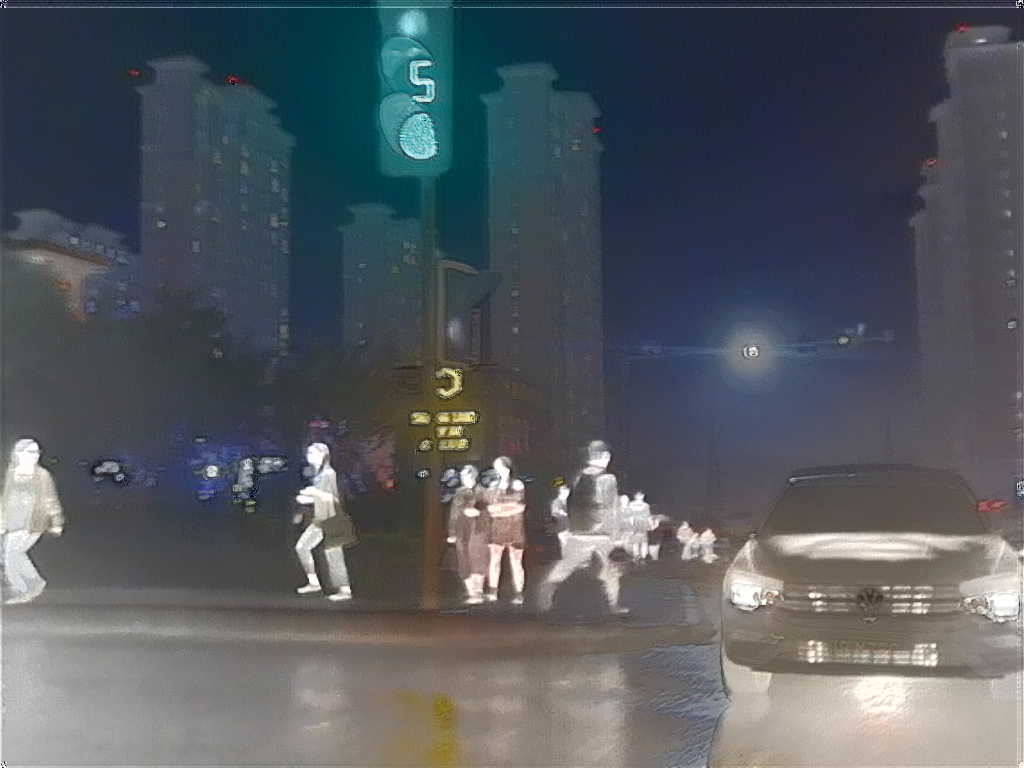

In [4]:
from pathlib import Path
from IPython import display
from pipeline.eval import Eval

CUDNN = False # use cudnn boost (recommend only if images are in same size)
HALF = False # use float16 instead of float32 for faster speed
EVAL = '+' in ID # use eval mode for tardal+ and tardal++
COLOR = True # colorize fused image(s) with corresponding visible image(s)

# fuse infrared and visible image(s)
eval = Eval(net, cudnn=CUDNN, half=HALF, eval=EVAL)
path = Path('data/sample/s1')
eval([path / 'ir/M3FD_00471.png'], [path / 'vi/M3FD_00471.png'], Path('runs/sample/s1'), color=COLOR)

# display sample
display.Image('runs/sample/s1/M3FD_00471.png')
